# Logistic Regression
The two most common linear classification algorithms are logistic regression, implemented in linear_model.LogisticRegression, and linear support vector machines (linear SVMs), implemented in svm.LinearSVC (SVC stands for support vector classifier). Despite its name, LogisticRegression is a classification algorithm and not a regression algorithm, and it should not be confused with LinearRegression.
We can apply the LogisticRegression and LinearSVC models to the forge dataset, and visualize the decision boundary as found by the linear models

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import mglearn
from matplotlib import pyplot as plt

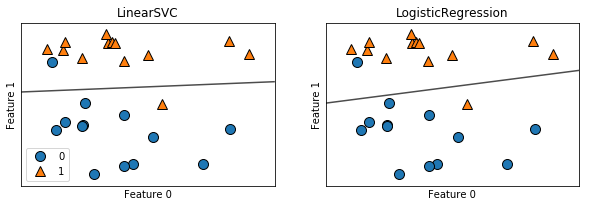

In [19]:
X,y=mglearn.datasets.make_forge()

flg,axes=plt.subplots(1,2,figsize=(10,3))

for model , ax in zip([LinearSVC(),LogisticRegression()],axes):
    clf=model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5,ax=ax,alpha=.7)
    
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title('{}'.format(clf.__class__.__name__))
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
axes[0].legend()

When you use a high value for the parameter C, Logis ticRegression and LinearSVC try to fit the training set as best as possible, while with low values of the parameter C, the models put more emphasis on finding a coefficient vector (w) that is close to zero.

There is another interesting aspect of how the parameter C acts. Using low values of C will cause the algorithms to try to adjust to the “majority” of data points, while using a higher value of C stresses the importance that each individual data point be classified correctly. Here is an illustration using LinearSVC

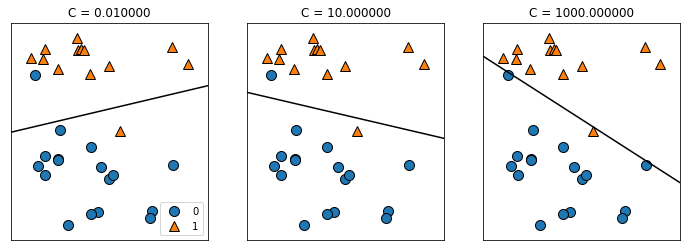

In [20]:
mglearn.plots.plot_linear_svc_regularization()

On the lefthand side, we have a very small C corresponding to a lot of regularization. Most of the points in class 0 are at the top, and most of the points in class 1 are at the bottom. The strongly regularized model chooses a relatively horizontal line, misclassifying two points. In the center plot, C is slightly higher, and the model focuses more on the two misclassified samples, tilting the decision boundary. Finally, on the righthand side, the very high value of C in the model tilts the decision boundary a lot, now correctly classifying all points in class 0. One of the points in class 1 is still misclassified, as it is not possible to correctly classify all points in this dataset using a straight line. The model illustrated on the righthand side tries hard to correctly classify all points, but might not capture the overall layout of the classes well. In other words, this model is likely overfitting. 

# Let's try Logistic Regression on Breast Cancer Detectection Dataset

In [33]:
from sklearn.datasets import load_breast_cancer
from sklearn.cross_validation import train_test_split
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)

logisitc=LogisticRegression().fit(X_train,y_train)
print('Training set score: {:.3f}'.format(logisitc.score(X_train,y_train)))
print('Test set score: {:.3f}'.format(logisitc.score(X_test,y_test)))

Training set score: 0.953
Test set score: 0.958


The default value of C=1 provides quite good performance, with 95% accuracy on both the training and the test set. But as training and test set performance are very close, it is likely that we are underfitting. Let’s try to increase C to fit a more flexible model:

In [43]:
logisitc100=LogisticRegression(C=100).fit(X_train,y_train)
print('Training set score: {:.3f}'.format(logisitc100.score(X_train,y_train)))
print('Test set score: {:.3f}'.format(logisitc100.score(X_test,y_test)))

Training set score: 0.972
Test set score: 0.965


We can also investigate what happens if we use an even more regularized model than the default of C=1, by setting C=0.01:


In [44]:
logisitc001=LogisticRegression(C=0.01).fit(X_train,y_train)
print('Training set score: {:.3f}'.format(logisitc100.score(X_train,y_train)))
print('Test set score: {:.3f}'.format(logisitc100.score(X_test,y_test)))

Training set score: 0.972
Test set score: 0.965


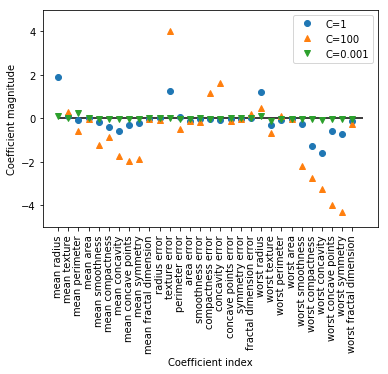

In [52]:
plt.plot(logisitc.coef_.T, 'o', label="C=1") 
plt.plot(logisitc100.coef_.T, '^', label="C=100") 
plt.plot(logisitc001.coef_.T, 'v', label="C=0.001") 
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90) 
plt.hlines(0, 0, cancer.data.shape[1]) 
plt.ylim(-5, 5) 
plt.xlabel("Coefficient index") 
plt.ylabel("Coefficient magnitude") 
plt.legend()